In [1]:
import pandas as pd
import numpy as np
import time
import scipy.optimize as opt
import pprint as pp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#------------------------------------------------------------------------------#
#2.25
def wage(alpha, A, capital, labor)            :
    wages = np.zeros([len(labor)])
    for i in range(0, len(labor))             :
        wages[i]= (1-alpha) * A * (np.power((capital/labor[i]), alpha))
    return(wages)
#------------------------------------------------------------------------------#
#2.26
def interest(alpha, A, labor, capital, delta) :
    interest = np.zeros([len(labor)])
    for i in range(0, len(labor))             :
        interest[i] = alpha * A * np.power((labor[i]/capital), (1-alpha)) - delta
    return(interest)

#------------------------------------------------------------------------------#

def capital(bvec_guess, b0 = 0)               :
    k = b0 + bvec_guess.sum()
    return(k)

#------------------------------------------------------------------------------#

def labor_supply(n_periods = 3)               :
    labor = np.ones(n_periods)
    labor [-1] = .2
    return(labor)

#------------------------------------------------------------------------------#

def production(A, capital, alpha, labor)      :
    p = A * (capital ** alpha) * (labor ** (1-alpha))
    return(p)

#------------------------------------------------------------------------------#

def crra(sigma, c)                            :
    u = (np.power(c, (1-sigma)) - 1 )/ 1-sigma

    u_prime = np.power(c, (-1*sigma))

    u_dbprime = -sigma * np.power(c, (-sigma - 1))
    return(u, u_prime, u_dbprime)

#------------------------------------------------------------------------------#

def consumptions(wage, labor_n, interest, savings):
    c = np.zeros([len(labor_n)])
    for i in range(0,len(labor_n))             :

        for j in range(1, len(labor_n)):
            if(i == len(labor_n)):
                c_p = wage[i] * labor_n[i] + ((1 + interest[i])*savings[i])
                c[i] = c_p
            else:
                c_p = wage[i] * labor_n[i] + ((1 + interest[i])*savings[i]) - savings[j]
                c[i] = c_p
    return(c)
#------------------------------------------------------------------------------#

***

### Question 1

In [3]:
def feasible(f_params,bvec_guess):

    '''
    f_params   : tuple of nvec, A, alpha, delta
    bvec_guess : array; guess for the steady statesavings vector

    K_cnstr    : singleton Bolean that equals True if K <= 0 for given f_params and bvec_guess

    c_cnstr    : length 3 bootlean vector where the s^th element equals true if c_s <= 0 given f_params

    b_cnstr    : length 2 boolean vector that denotes which element of bvec guess is likely responsible
    for any of the consumption nonnegativity constraint violations identified by c_cnstr

    * if the first element of c_cnstr is True, then the first element of b_cnstr is true
    * if the scond element of c_cnstr is True than both element of b_cnstr is true
    * if the last element of c_cnstr is True than the last elmenet of b_cnstr is true

    nvec       : labor supply. If s = 1 or 2, n = 1 -- if n = 3, s = .2



    * f_params :

            * nvec = units of labor provided over n periods.
                      n = 1 for all periods except for last, in which n = .2

            * A =

            * alpha =

            * delta =

    '''
    #--------------------------------------------------------------------------#
    #Declare problem paramters
    n_periods, sigma, A, alpha, delta, beta = f_params
    b0 = bvec_guess[0]
    k = bvec_guess.sum()
    l = np.array([1,1.2])
    w = wage(alpha, A, k, l)
    r = interest(alpha, A, l, k, delta)
    p = production(A, k, alpha, l)
    c = consumptions(w,l, r, bvec_guess)
    #--------------------------------------------------------------------------#

    #initializing emply constraint check

    b_cnstr = np.zeros(2)
    c_cnstr = np.zeros(3)

    #--------------------------------------------------------------------------#
    #c constraint is 3 boolen vector
    #wage, labor_n, interest, savings_p, savings_tp1

    #Determine capital constraint
    if k <= 0                                     :
        k_cnstr = True
    else                                          :
        k_cnstr = False


    #consumption constraint                       : where c >= 0 for all periods and ages
    #If value is True, than the constrinat is met. If the value at index i is False
    # than the constraint is not met.
    for j in range(0, len(c))                     :
        if c[j] >= 0                              :
            c_cnstr[j] = True
        else                                      :
            c_cnstr[j] = False

    #Determine savings (b) constraint
    #True == constraint met
    #False = constraint not met
    #* if the first element of c_cnstr is True, then the first element of b_cnstr is true
    #* if the scond element of c_cnstr is True than both element of b_cnstr is true
    #* if the last element of c_cnstr is True than the last elmenet of b_cnstr is true
    if c_cnstr[0] == True                         :
        b_cnstr[0] = True

    if c_cnstr[1] == True                         :
        b_cnstr = np.array([True, True])

    if c_cnstr[-1] == True                        :
        b_cnstr[-1] = True

    properties = {
        'savings': bvec_guess,
        'capital': k,
        'labor': l,
        'wages': w,
        'interest': r,
        'production': p,
        'consumption': c
        }
    return(k_cnstr, b_cnstr, c_cnstr, properties)


In [4]:
#------------------------------------------------------------------------------#
# Initial Parameters
#------------------------------------------------------------------------------#
sigma = 3
A = 1
alpha = .35
delta = .6415
beta = .442
n_periods = 3
laborSupply = labor_supply(n_periods)
SS_tol = 1e-5
f_params = (n_periods, sigma, A, alpha, delta, beta)

#### Question 1.a

In [5]:
bvec_guess = np.array([0,1.0,1.2])
k_cnstr1, b_cnstr1, c_cnstr1,properties1 = feasible(f_params, bvec_guess)
print("bvec_guess ={}".format(bvec_guess))
print("K constraing: {}".format(k_cnstr1))
print("B constraint: {}".format(b_cnstr1))
print("C constraint: {}".format(c_cnstr1))

bvec_guess =[0.  1.  1.2]
K constraing: False
B constraint: [ True  True]
C constraint: [0. 1. 0.]


#### Question 1.b

In [6]:
bvec_guess = np.array([0.0,0.06,-0.001])
k_cnstr2, b_cnstr2, c_cnstr2, properties2 = feasible(f_params, bvec_guess)
print("bvec_guess = {}".format(bvec_guess))
print("K constraing: {}".format(k_cnstr2))
print("B constraint: {}".format(b_cnstr2))
print("C constraint: {}".format(c_cnstr2))


bvec_guess = [ 0.     0.06  -0.001]
K constraing: False
B constraint: [ True  True]
C constraint: [1. 1. 0.]


#### Question 1.c

In [7]:
bvec_guess = np.array([0.0,0.1,0.1])
k_cnstr3, b_cnstr3, c_cnstr3, properties3 = feasible(f_params, bvec_guess)
print("bvec_guess = {}".format(bvec_guess))
print("K constraing: {}".format(k_cnstr3))
print("B constraint: {}".format(b_cnstr3))
print("C constraint: {}".format(c_cnstr3))

bvec_guess = [0.  0.1 0.1]
K constraing: False
B constraint: [ True  True]
C constraint: [1. 1. 0.]


***

### Question 2

In [8]:
def euler_errors(bvec_guess, *args):
    
    b0, beta, sigma, labor, A, alpha, delta, SS_tol = args
    
    K = b0 + bvec_guess.sum()

    L = labor.sum()
    
    #print(K,L)
    
    r = interest(alpha = alpha, A = A, labor = np.array([L]), capital = K, delta =delta)
    
    w = wage(alpha, A, capital = K, labor = np.array([L]) ) 
    #print(r,w)
    
    b = np.array([b0, *bvec_guess])
    
    b_tp1 = np.array([*bvec_guess, 0])
    
    c = (w * labor) + (1 + r) * b - b_tp1
    
    euler_err = np.zeros([2])

    uprimes = crra(sigma, c)[1]

    for i in range(0, len(b)-1):
        euler_err[i] = beta * (1+r) * uprimes[i+1] - uprimes[i]

    return(euler_err)

In [9]:
def get_SS(bvec_guess, params, plot_SS = True):
    
    start_time = time.clock()
    
    b0, beta, sigma, laborSupply, A, alpha, delta, SS_tol = params
    
    ee_params = (b0, beta, sigma, laborSupply, A, alpha, delta, SS_tol)
   
    euler_root = opt.root(euler_errors, bvec_guess, args = ee_params)
    #----------------------------------------------------------------#
    
    b_ss = np.array([*euler_root.x,0.0])
    
    K_ss = euler_root.x.sum()
    
    L_ss = np.array([laborSupply.sum()])
    
    Y_ss =  production(A, K_ss, alpha,L_ss) 
    
    r_ss = interest(alpha, A, L_ss, K_ss, delta)
    
    w_ss = wage(alpha, A, capital = K_ss, labor = L_ss)
    
    b_ss_tp1 = np.array([*b_ss[1:], 0])
    
    c_ss = (w_ss * laborSupply) + (1 + r_ss) * b_ss - b_ss_tp1
    
    C_ss = c_ss.sum()
    
    EulErr_ss = euler_root.fun
    
    RCerr_ss = Y_ss - C_ss - (delta * K_ss)

    ss_time = time.clock() - start_time
    
    ss_output = {
        "b_ss": b_ss, 
        "c_ss": c_ss, 
        "w_ss": w_ss, 
        "r_ss": r_ss,
        "K_ss": K_ss, 
        "Y_ss": Y_ss, 
        "C_ss": C_ss,
        "EulErr_ss": EulErr_ss, 
        "RCerr_ss": RCerr_ss,
        "ss_time": ss_time}
    
    if plot_SS:
        plt.figure(figsize = (10,10))
        plt.plot(ss_output['c_ss'], label = "consumption")
        plt.plot(ss_output['b_ss'], label = "savings")
        plt.legend()
        plt.title("Consumption and Savings over 3 Periods")
        plt.xlabel("Period")
        plt.ylabel("Value")
    
    return(ss_output)

#### Question 2.a and 2.b

{'b_ss': array([0.01931253, 0.0584111 , 0.        ]),
 'c_ss': array([0.20961468, 0.40225359, 0.04034493]),
 'w_ss': array([0.20172466]),
 'r_ss': array([2.43306234]),
 'K_ss': 0.07772362575316386,
 'Y_ss': array([0.68276038]),
 'C_ss': 0.6522132027716135,
 'EulErr_ss': array([ 1.39266376e-12, -2.62900812e-12]),
 'RCerr_ss': array([-0.01931253]),
 'ss_time': 0.0022299999999999542}

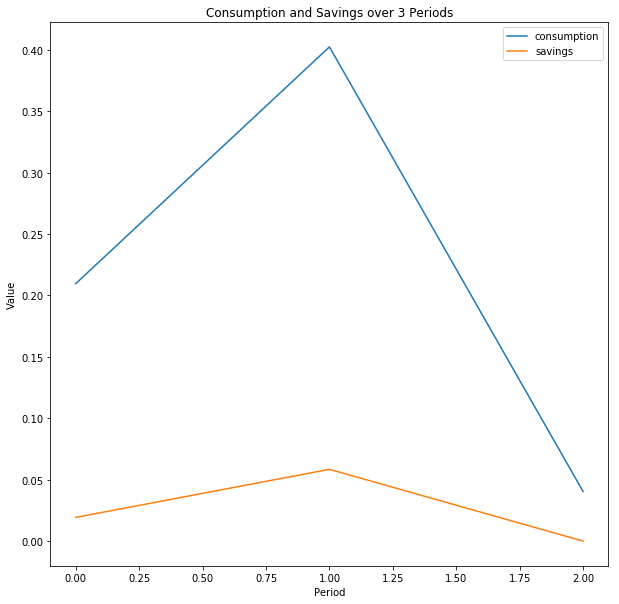

In [10]:
b0 = 0
bvec_guess = np.array([.1,.1])
ee_params = (b0, beta, sigma, laborSupply, A, alpha, delta, SS_tol)
get_SS(bvec_guess, ee_params, plot_SS = True)


***

#### Question 2.c

{'b_ss': array([0.02817692, 0.07686545, 0.        ]),
 'c_ss': array([0.22861594, 0.44601483, 0.04483044]),
 'w_ss': array([0.2241522]),
 'r_ss': array([1.88637651]),
 'K_ss': 0.1050423702259807,
 'Y_ss': array([0.75866897]),
 'C_ss': 0.7194612092703347,
 'EulErr_ss': array([-6.87805368e-12, -2.52953214e-12]),
 'RCerr_ss': array([-0.02817692]),
 'ss_time': 0.0013670000000001181}

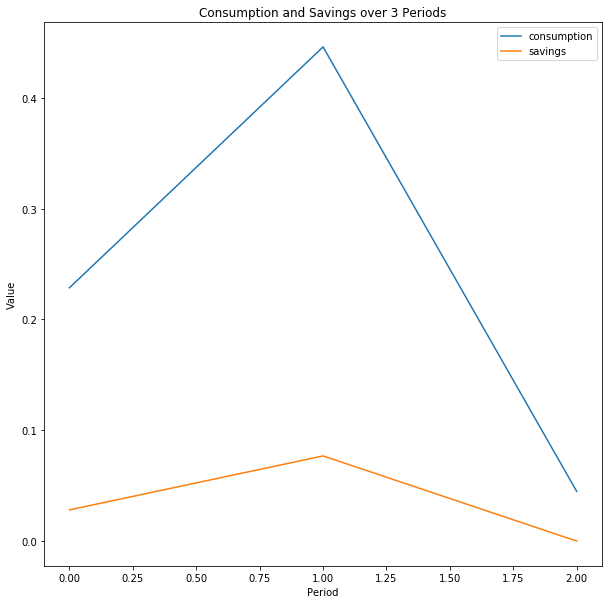

In [11]:
b0 = 0
bvec_guess = np.array([.1,.1])
beta = .55
ee_params = (b0, beta, sigma, laborSupply, A, alpha, delta, SS_tol)
get_SS(bvec_guess, ee_params, plot_SS = True)

### Question 3:

In [180]:
def EulerError_2(b, *args):
    #euler equation for difference between middle and old age
    
    w,r,laborSupply,s,t, sigma= args
    
    consumption1 = crra(sigma, c = (w[t] * laborSupply[s]) + (1 + r[t])*b[s] - b[s+1])[1]
    
    consumption2 = beta * (1 + r[t+1]) * crra(sigma, c = ((w[t] * laborSupply[s+1]) + (1 + r[t])*b[s+1]))[1]
    
    eulerErr = consumption1 - consumption2
    
    return(eulerErr)

In [187]:
def tpi(bvec_guess, params):
    
    max_iterations = 10
    
    epsilon = 10e-9
    
    eps_p1 = epsilon + 1
    
    T, b0, beta, sigma, laborSupply, A, alpha, delta, SS_tol = params
    
    ss_params =(b0, beta, sigma, laborSupply, A, alpha, delta, SS_tol)
    
    steady_state = get_SS(bvec_guess, ss_params, plot_SS = False)
    
    b23_tpi = np.array([0,(.8 * bvec_guess[0]), (1.1 * bvec_guess[1])])
    
    s = 1
    
    #capital starts at an initial state and ends at the steady state:
    K = np.linspace(b23_tpi.sum(),steady_state['K_ss'], T)
    
    r = alpha * A * ((laborSupply.sum() / K) ** (1 - alpha)) - delta
    
    w = (1-alpha) * A * (np.power((K/laborSupply.sum()), alpha))
    
    iter = 0
          
    while iter < max_iterations and epsilon < eps_p1:
        
        for t in range(T-2):
            ee_params = (w,r,laborSupply,s,t, sigma)
            opt.root(EulerError_2, b23_tpi, args = ee_params)

        iter+=1
        

In [188]:
T = 49
bvec_guess = np.array([.1, .1])
tpi_params = (T, b0, beta, sigma, laborSupply, A, alpha, delta, SS_tol)
tpi(bvec_guess, tpi_params)

TypeError: fsolve: there is a mismatch between the input and output shape of the 'func' argument 'EulerError_2'.Shape should be (3,) but it is (1,).